# Introduction to network analysis

![image-2.png](https://www.annalindhfoundation.org/sites/default/files/styles/main_image_desktop/public/2019-10/bg-featured-second.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-importance-of-beeing-central:-The-Medici" data-toc-modified-id="The-importance-of-beeing-central:-The-Medici-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The importance of beeing central: The Medici</a></span><ul class="toc-item"><li><span><a href="#Degree-centrality" data-toc-modified-id="Degree-centrality-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Degree centrality</a></span></li><li><span><a href="#Closeness-centrality" data-toc-modified-id="Closeness-centrality-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Closeness centrality</a></span></li><li><span><a href="#Eigenvector-centrality" data-toc-modified-id="Eigenvector-centrality-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Eigenvector centrality</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li><li><span><a href="#Detecting-communities:-The-Zackary-Karate-Club" data-toc-modified-id="Detecting-communities:-The-Zackary-Karate-Club-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detecting communities: The Zackary Karate Club</a></span></li><li><span><a href="#Game-of-Thrones-Network" data-toc-modified-id="Game-of-Thrones-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Game of Thrones Network</a></span><ul class="toc-item"><li><span><a href="#GOT-recommender-system" data-toc-modified-id="GOT-recommender-system-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>GOT-recommender system</a></span></li><li><span><a href="#Interesting" data-toc-modified-id="Interesting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Interesting</a></span><ul class="toc-item"><li><span><a href="#Special-thanks-to" data-toc-modified-id="Special-thanks-to-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Special thanks to</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (18, 10)})
sns.set_style('whitegrid')

In [23]:
import networkx as nx
import nxviz as nv #----> Library with many options to draw nx Graphs
# https://nxviz.readthedocs.io/en/latest/usage.html

In [38]:
def display_centrality_graph(graph, centrality_values, new_range_max=10000, new_range_min=300):
    node_sizes = [v for (n, v) in centrality_values.items()]

    new_range = new_range_max - new_range_min
    old_range_min = min(node_sizes)
    old_range_max = max(node_sizes)
    old_range = old_range_max - old_range_min
    node_sizes = [(new_range_min + (((v - old_range_min) / old_range) * new_range)) for v in node_sizes]

    plt.figure(figsize=(15, 9))
    plt.axis("off")
    nx.draw_networkx(G=graph, node_size=node_sizes, node_color='g', font_color='k', alpha=0.9)
    plt.show()

In [40]:
# Create a Graph
G = nx.Graph()
# nx.DiGraph   ----> Directional Graph
# nx.MultiGraph ---> Multiedge (Directional) Graph
type(G)

networkx.classes.graph.Graph

In [41]:
G.add_nodes_from(["A","B","C"])

In [42]:
G.nodes()

NodeView(('A', 'B', 'C'))

In [43]:
G.nodes["A"]

{}

In [44]:
G.nodes["A"]["color"] = "blue"
G.nodes["B"]["color"] = "gray"
G.nodes["B"]["dimension"] = (3,2,4)

In [45]:
G.nodes["A"]

{'color': 'blue'}

In [46]:
G.nodes(data=True)

NodeDataView({'A': {'color': 'blue'}, 'B': {'color': 'gray', 'dimension': (3, 2, 4)}, 'C': {}})

In [47]:
G.add_edge("A","B")
G.add_edge("B","C")

In [48]:
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

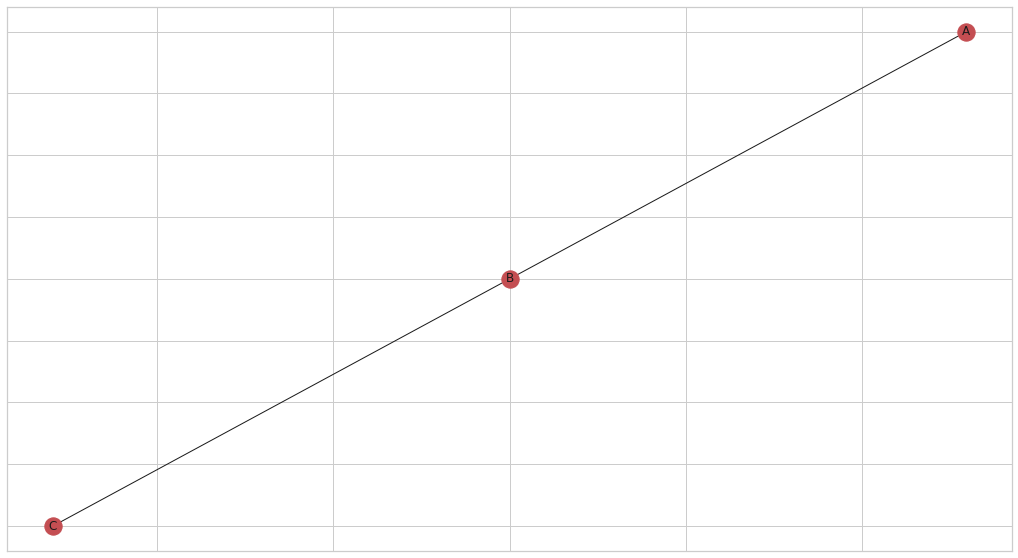

In [49]:
nx.draw_networkx(G, node_color='r', font_color='k')
plt.show()

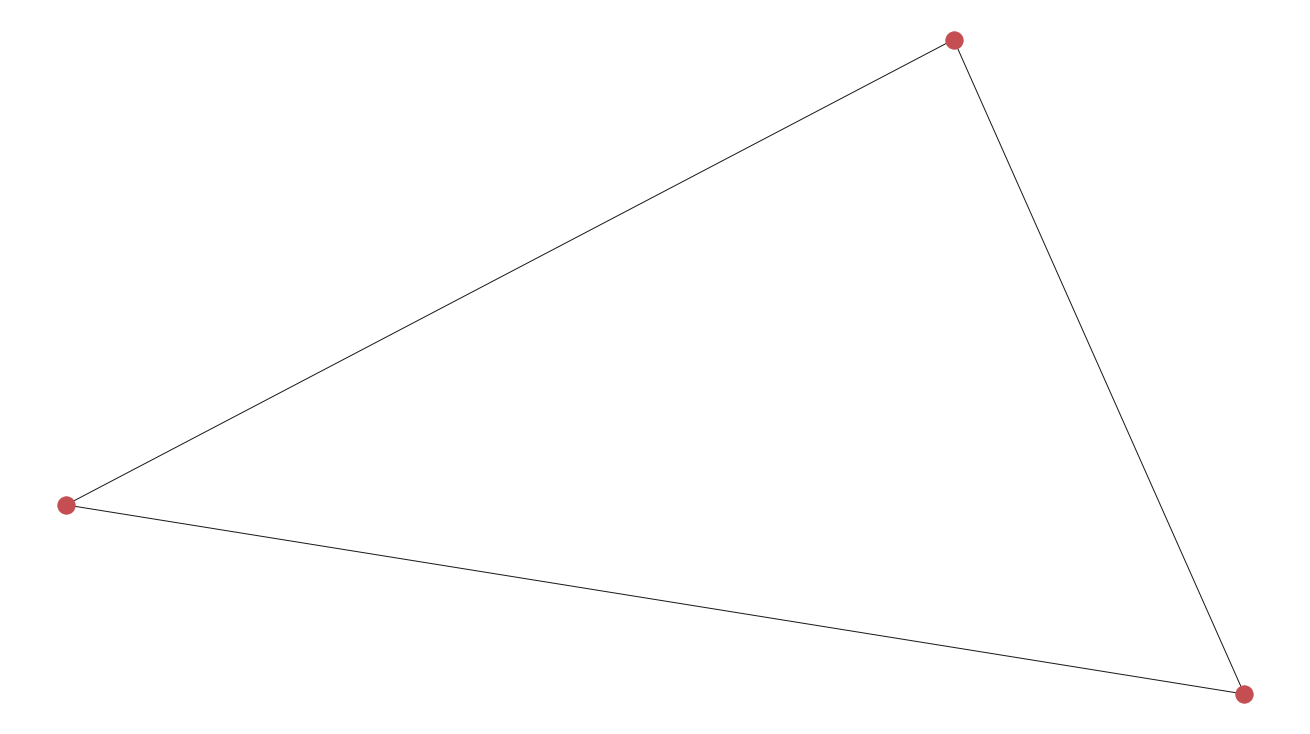

In [21]:
G.add_edge("A","C")
nx.draw(G, node_color='r', font_color='k')
plt.show()

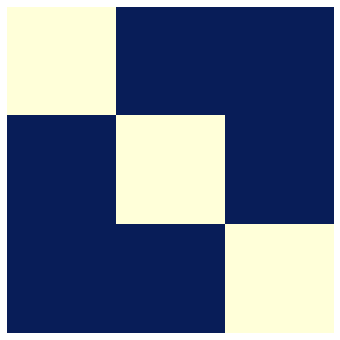

In [28]:
graph = nv.plots.MatrixPlot(G)
graph.draw()
plt.show()

## The importance of beeing central: The Medici

We will analyze the network of marriage links between the main Florentine families. Two families were in conflict: the Medici and the Strozzi. Power and money were the reasons. The Medici family did not have greatest wealth or most seats in the legislature, yet it rose to power. Through marriages, the Medici family had a position of centrality in the social network, crucial for communication, brokering deals, etc.

You can read more about the rise of the Medici in the original paper from Padgett: Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500. Paper delivered to the Social Science History Association.

In [50]:
G = nx.florentine_families_graph()

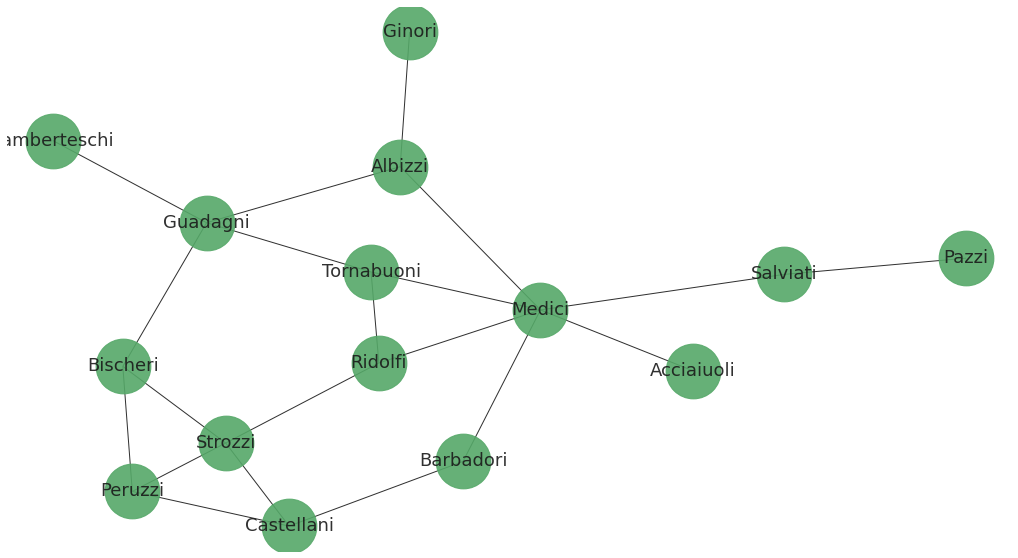

In [59]:
# Plot the network
plt.axis("off")
nx.draw_networkx(G=G, node_size=3000, 
                 node_color='g', 
                 font_color='k', 
                 alpha=0.9,
                 font_size=18)
plt.show()

### Degree centrality

Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has)

NOTE: all definitions of centrality are taken from [Wikipedia](https://en.wikipedia.org/wiki/Centrality#Degree_centrality)

In [32]:
G.nodes(data=True)

NodeDataView({'Acciaiuoli': {}, 'Medici': {}, 'Castellani': {}, 'Peruzzi': {}, 'Strozzi': {}, 'Barbadori': {}, 'Ridolfi': {}, 'Tornabuoni': {}, 'Albizzi': {}, 'Salviati': {}, 'Pazzi': {}, 'Bischeri': {}, 'Guadagni': {}, 'Ginori': {}, 'Lamberteschi': {}})

In [33]:
G.edges()

EdgeView([('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')])

In [34]:
deg_centrality_dict = nx.degree_centrality(G)

In [37]:
6/14

0.42857142857142855

In [35]:
deg_centrality_dict

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

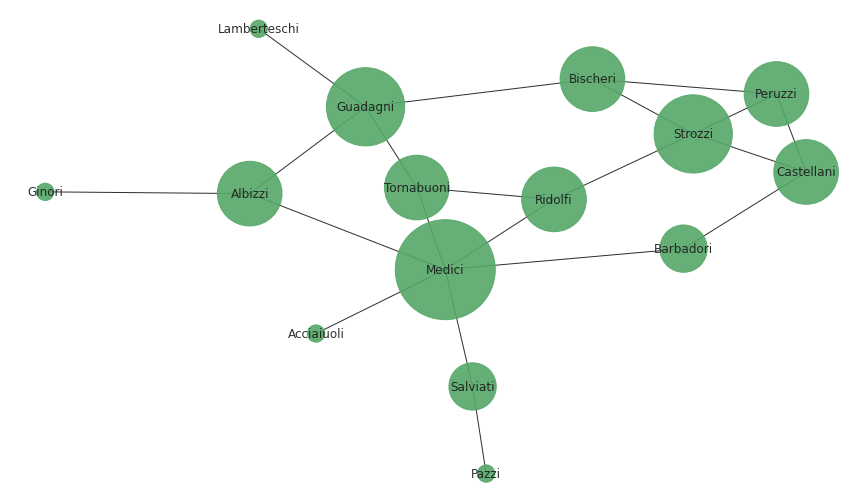

In [60]:
display_centrality_graph(graph=G, centrality_values=deg_centrality_dict)

### Closeness centrality

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

$$C(x)= \frac{1}{\sum_y d(y,x)}$$

In [61]:
closeness_centrality_dict = nx.closeness_centrality(G)
closeness_centrality_dict

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

Curious on how to actually compute the shortest distance between two nodes? Take a look at this video explaining a famous algorithm to calculate it! The [Dijkstra´s algorithm](https://www.youtube.com/watch?v=GazC3A4OQTE&t=550s)

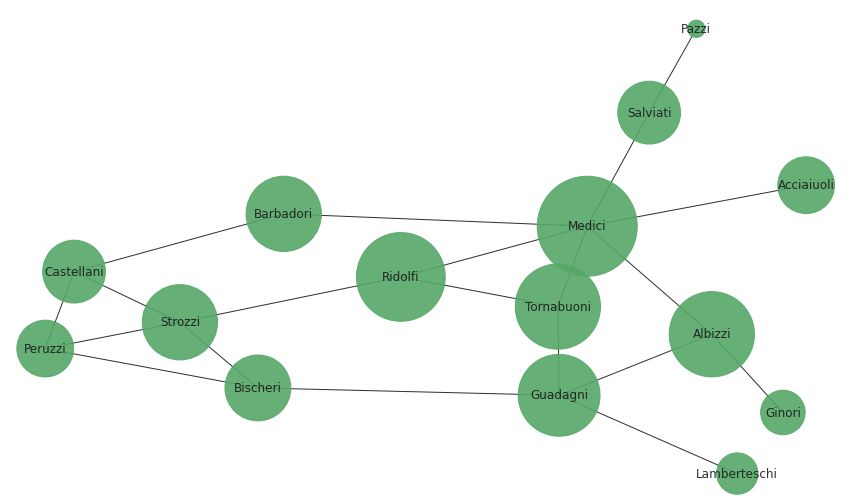

In [62]:
display_centrality_graph(graph=G, centrality_values=closeness_centrality_dict)

### Eigenvector centrality

Eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Google's PageRank and the Katz centrality are variants of the eigenvector centrality.

For a given graph $G:=(V,E)$ with $|V|$ number of vertices let $A = (a_{v,t})$ be the [[adjacency matrix]], i.e. $a_{v,t} = 1$ if vertex $v$ is linked to vertex $t$, and $a_{v,t} = 0$ otherwise. The relative centrality score of vertex $v$ can be defined:

$$x_v = \frac{1}{\lambda} \sum_{t \in M(v)}x_t = \frac{1}{\lambda} \sum_{t \in G} a_{v,t}x_t$$

where $M(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant. With a small rearrangement this can be rewritten in vector notation as the eigenvector equation

$$\mathbf{Ax} = {\lambda}\mathbf{x}$$

In [63]:
eigenv_centrality_dict = nx.eigenvector_centrality(G)
eigenv_centrality_dict

{'Acciaiuoli': 0.1321573195285342,
 'Medici': 0.4303154258349923,
 'Castellani': 0.2590200378423514,
 'Peruzzi': 0.2757224374104833,
 'Strozzi': 0.3559730326460451,
 'Barbadori': 0.2117057470647985,
 'Ridolfi': 0.3415544259074365,
 'Tornabuoni': 0.325846704169574,
 'Albizzi': 0.2439605296754477,
 'Salviati': 0.14592084164171834,
 'Pazzi': 0.044814939703863084,
 'Bischeri': 0.2827943958713356,
 'Guadagni': 0.2891171573226501,
 'Ginori': 0.0749245316027793,
 'Lamberteschi': 0.08879253113499548}

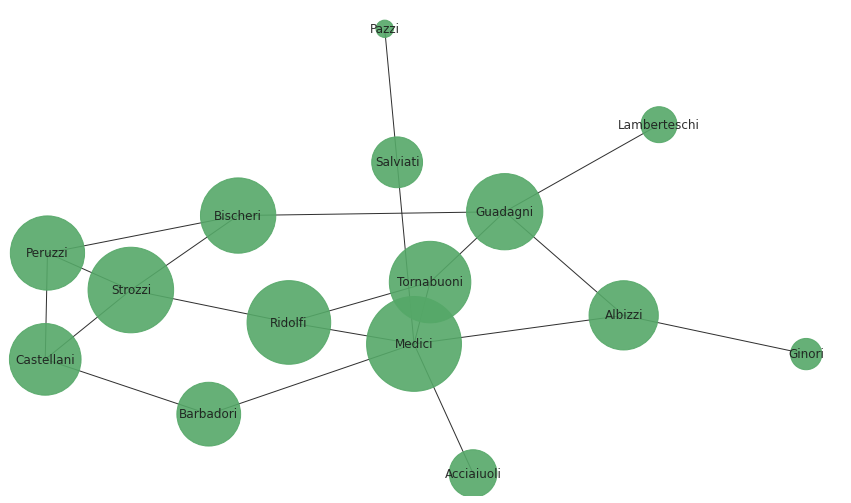

In [64]:
display_centrality_graph(graph=G, centrality_values=eigenv_centrality_dict, 
                         new_range_max=9000)

### Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

The betweenness of a vertex <math>v</math> in a graph <math>G:=(V,E)</math> with <math>V</math> vertices is computed as follows:

* For each pair of vertices $(s,t)$, compute the shortest paths between them.
* For each pair of vertices $(s,t)$, determine the fraction of shortest paths that pass through the vertex in question (here, vertex $v$).
* Sum this fraction over all pairs of vertices $(s,t)$.

In [65]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
betweenness_centrality_dict

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

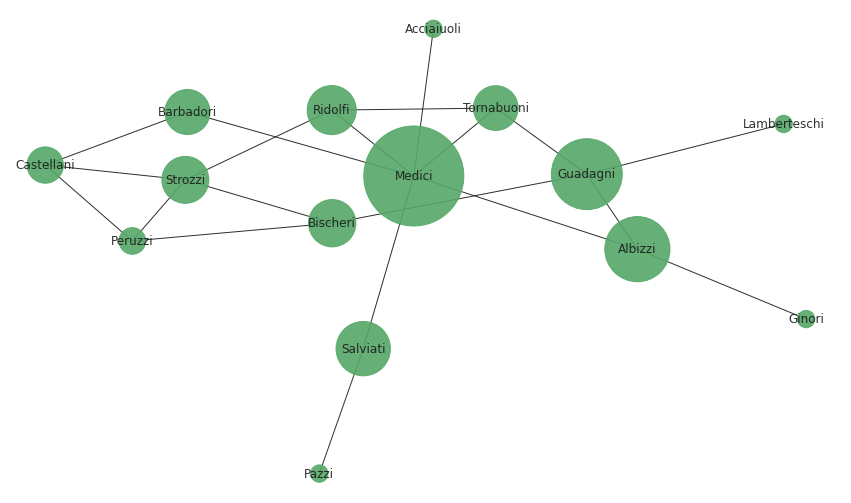

In [66]:
display_centrality_graph(graph=G, 
                         centrality_values=betweenness_centrality_dict)

## Detecting communities: The Zackary Karate Club

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.


In [67]:
G = nx.karate_club_graph()

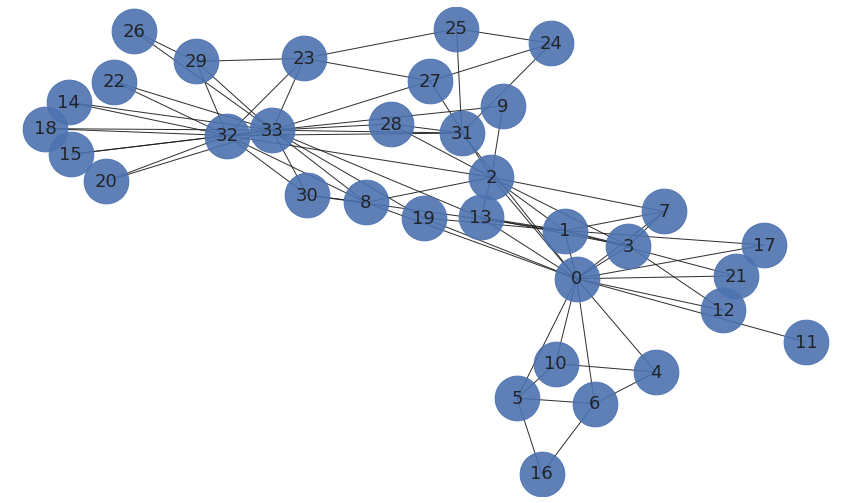

In [68]:
# Plot the network
plt.figure(figsize=(15, 9))
plt.axis("off")
pos=nx.spring_layout(G)
nx.draw_networkx(G=G, pos=pos ,node_size=2000, node_color='b', 
                 font_color='k', alpha=0.9, font_size=18)


The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.

The algorithm's steps for community detection are summarized below

* The betweenness of all existing edges in the network is calculated first.
* The edge(s) with the highest betweenness are removed.
* The betweenness of all edges affected by the removal is recalculated.
* Steps 2 and 3 are repeated until no edges remain.

In [69]:
from networkx.algorithms.community.centrality import girvan_newman
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
import itertools

In [70]:
comp = girvan_newman(G)
comp

<generator object girvan_newman at 0x7f7d4a078900>

In [72]:
# list(comp)

In [73]:
k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9])


In [74]:
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {9})

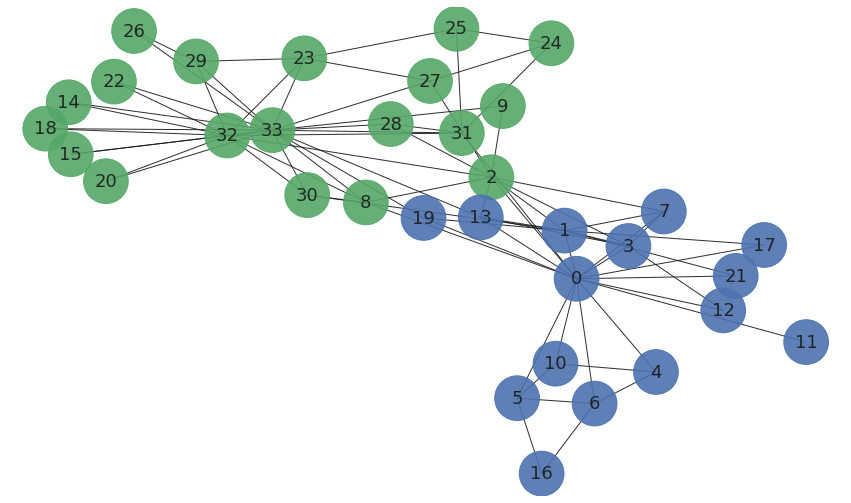

In [77]:
plt.figure(figsize=(15, 9))
plt.axis("off")
node_colors = ['b' if (n in communities[0]) else 'g' for n in G.nodes() ]
nx.draw_networkx(G=G, pos=pos,node_size=2000, node_color=node_colors, 
                 font_color='k', alpha=0.9, font_size=18)


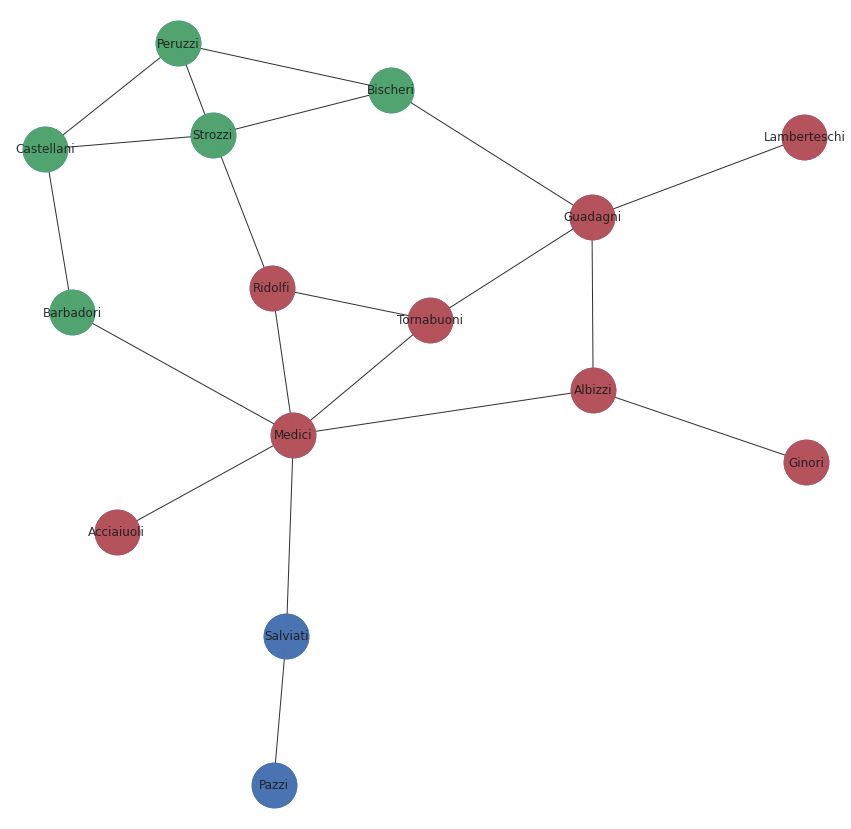

In [78]:
# Back to the Medici
k = 2
G = nx.florentine_families_graph()
pos=nx.spring_layout(G)
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    tuple(sorted(c) for c in communities)

plt.figure(figsize=(15, 15))
plt.axis("off")
# Draw the graph, but don't color the nodes
params = {'G':G, 'pos':pos,'node_size':2000, 'alpha':0.9,  }
nx.draw_networkx(**params, font_color='k', font_size=12)

colors = ['r','g', 'b', 'y', 'orange', 'purple']

#For each community list, draw the nodes, giving it a specific color.
for x in range(len(communities)):
    nx.draw_networkx_nodes(**params, nodelist=communities[x], node_color=colors[x])

plt.show()


## Game of Thrones Network

Data and original idea are taken from this [blog entry](https://networkofthrones.wordpress.com/)

In [79]:
import pandas as pd

In [99]:
got_data = pd.read_csv('data/got_edges.csv')

In [100]:
got_data.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


In [101]:
G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')

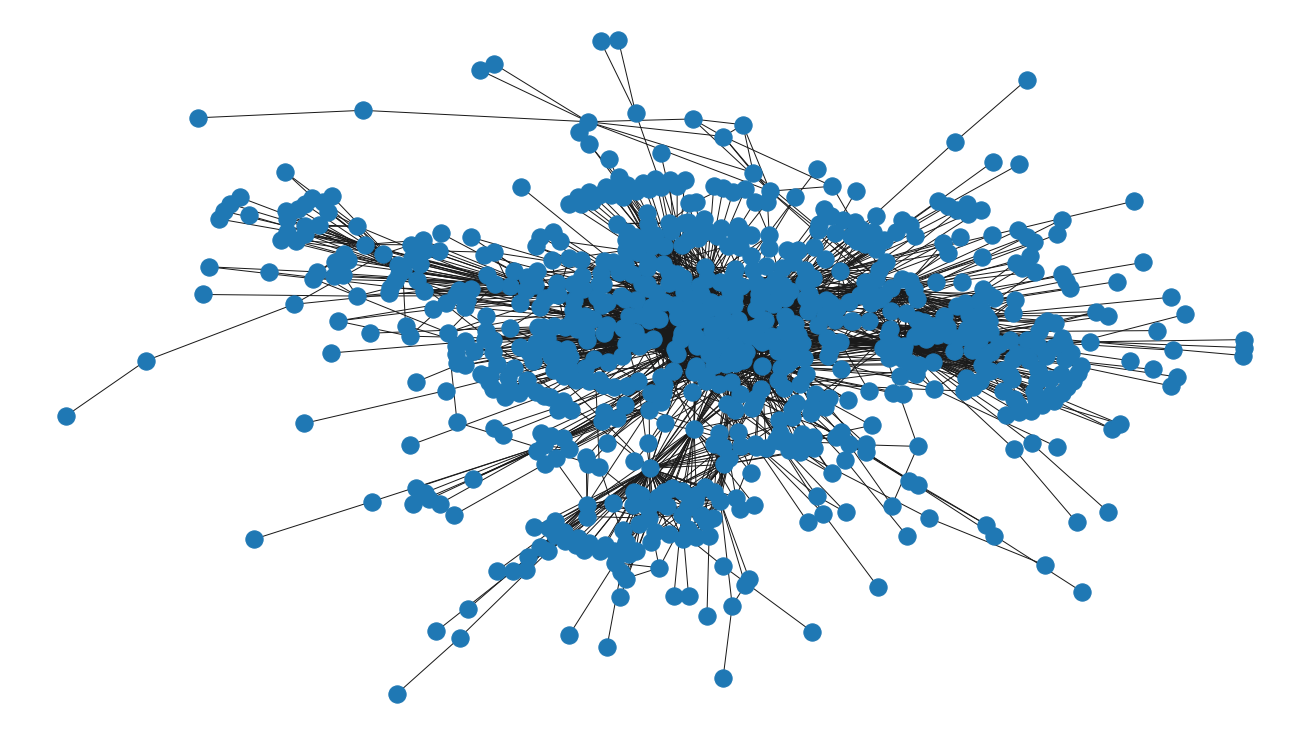

In [103]:
nx.draw(G)
plt.show()

In [83]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 796
Number of edges: 2823
Average degree:   7.0930


In [84]:
nx.average_shortest_path_length(G)

3.416225783003066

In [85]:
nx.diameter(G)

9

In [86]:
nx.average_clustering(G)

0.48586220733504853

In [87]:
deg_centrality_dict = nx.degree_centrality(G)
deg_centrality_dict

{'Addam-Marbrand': 0.01509433962264151,
 'Brynden-Tully': 0.023899371069182388,
 'Cersei-Lannister': 0.1220125786163522,
 'Gyles-Rosby': 0.022641509433962263,
 'Jaime-Lannister': 0.1270440251572327,
 'Jalabhar-Xho': 0.006289308176100628,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Kevan-Lannister': 0.021383647798742137,
 'Lyle-Crakehall': 0.006289308176100628,
 'Oberyn-Martell': 0.025157232704402514,
 'Tyrion-Lannister': 0.15345911949685534,
 'Tywin-Lannister': 0.06037735849056604,
 'Varys': 0.042767295597484274,
 'Aegon-Frey-(son-of-Stevron)': 0.005031446540880503,
 'Catelyn-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Stevron-Frey': 0.006289308176100628,
 'Walder-Frey': 0.023899371069182388,
 'Aegon-I-Targaryen': 0.011320754716981131,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Eddard-Stark': 0.0930817610062893,
 'Harren-Hoare': 0.0037735849056603774,
 'Nan': 0.010062893081761006,
 'Rhaenys-Targaryen': 0.0025157232704402514,
 'Stannis-Baratheon': 0.11194968553

In [88]:
# degree_centrality
dict(sorted(deg_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.15345911949685534,
 'Jon-Snow': 0.14339622641509434,
 'Jaime-Lannister': 0.1270440251572327,
 'Cersei-Lannister': 0.1220125786163522,
 'Stannis-Baratheon': 0.11194968553459118,
 'Arya-Stark': 0.10566037735849056,
 'Catelyn-Stark': 0.09433962264150943,
 'Sansa-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Eddard-Stark': 0.0930817610062893,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Theon-Greyjoy': 0.0830188679245283,
 'Robert-Baratheon': 0.08176100628930817,
 'Bran-Stark': 0.06792452830188679,
 'Tywin-Lannister': 0.06037735849056604,
 'Petyr-Baelish': 0.059119496855345906,
 'Brienne-of-Tarth': 0.056603773584905655,
 'Samwell-Tarly': 0.05534591194968553,
 'Barristan-Selmy': 0.05157232704402515,
 'Renly-Baratheon': 0.047798742138364776,
 'Sandor-Clegane': 0.045283018867924525,
 'Varys': 0.042767295597484274,
 'Mance-Rayder': 0.04150943396226415,
 'Davos-Seaworth': 0.04150943396226415,
 'Gregor-Clegane

In [89]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
dict(sorted(betweenness_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Jon-Snow': 0.1921196196835449,
 'Tyrion-Lannister': 0.1621910961115984,
 'Daenerys-Targaryen': 0.11841801916269204,
 'Theon-Greyjoy': 0.11128331813470228,
 'Stannis-Baratheon': 0.11013955266679566,
 'Jaime-Lannister': 0.10083800602581632,
 'Cersei-Lannister': 0.08870426655860289,
 'Arya-Stark': 0.08724236063571153,
 'Eddard-Stark': 0.07873239257251873,
 'Robert-Baratheon': 0.07822769060383258,
 'Robb-Stark': 0.06646842683586629,
 'Catelyn-Stark': 0.054973667953404186,
 'Sansa-Stark': 0.04869098175180615,
 'Barristan-Selmy': 0.045549578315223826,
 'Bran-Stark': 0.04491117872765179,
 'Samwell-Tarly': 0.041466203660771125,
 'Victarion-Greyjoy': 0.03645073716796517,
 'Asha-Greyjoy': 0.03302475436760232,
 'Brienne-of-Tarth': 0.032251918885194235,
 'Joffrey-Baratheon': 0.03175872220136575,
 'Petyr-Baelish': 0.02589858342955331,
 'Davos-Seaworth': 0.023846811266965424,
 'Tywin-Lannister': 0.020669858406317167,
 'Myrcella-Baratheon': 0.020192886619454075,
 'Aemon-Targaryen-(Maester-Aemon)': 

In [94]:
[p for p in betweenness_centrality_dict.keys() if "Stark" in p]

['Catelyn-Stark',
 'Robb-Stark',
 'Eddard-Stark',
 'Torrhen-Stark',
 'Arya-Stark',
 'Brandon-Stark',
 'Bran-Stark',
 'Sansa-Stark',
 'Benjen-Stark',
 'Rickon-Stark',
 'Rickard-Stark',
 'Lyanna-Stark']

In [95]:
betweenness_centrality_dict['Eddard-Stark']

0.07873239257251873

In [96]:
eigenv_centrality_dict = nx.eigenvector_centrality(G)
dict(sorted(eigenv_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.25155836369082013,
 'Cersei-Lannister': 0.2357712102434478,
 'Jaime-Lannister': 0.2263385016604407,
 'Joffrey-Baratheon': 0.2143762701904281,
 'Sansa-Stark': 0.20584216286964804,
 'Robert-Baratheon': 0.19437504050942284,
 'Eddard-Stark': 0.19165954952371533,
 'Stannis-Baratheon': 0.18208517838192134,
 'Catelyn-Stark': 0.17588556613451878,
 'Robb-Stark': 0.17319627185782438,
 'Arya-Stark': 0.17262429883863645,
 'Tywin-Lannister': 0.15977767971339735,
 'Petyr-Baelish': 0.15296001946450774,
 'Jon-Snow': 0.14421103711284516,
 'Renly-Baratheon': 0.13055138226230373,
 'Varys': 0.1298046290237375,
 'Gregor-Clegane': 0.1228746790344843,
 'Sandor-Clegane': 0.12284707960753136,
 'Bran-Stark': 0.12254401233778377,
 'Loras-Tyrell': 0.12109166546018844,
 'Tommen-Baratheon': 0.11715847777982166,
 'Brienne-of-Tarth': 0.11630467532646598,
 'Pycelle': 0.11131965999963032,
 'Theon-Greyjoy': 0.10248099448782544,
 'Barristan-Selmy': 0.09809138096001006,
 'Ilyn-Payne': 0.094923903014

In [104]:
selec = sorted(eigenv_centrality_dict.items(), key=lambda item: item[1], reverse=True)
selec = dict(selec[:200]).keys()
#selec

In [105]:
data = got_data[got_data["Source"].isin(selec) & got_data["Target"].isin(selec)]
# Plot communities
k = 3
G = nx.from_pandas_edgelist(data,  source='Source', target='Target')
pos = nx.spring_layout(G)
comp = girvan_newman(G)

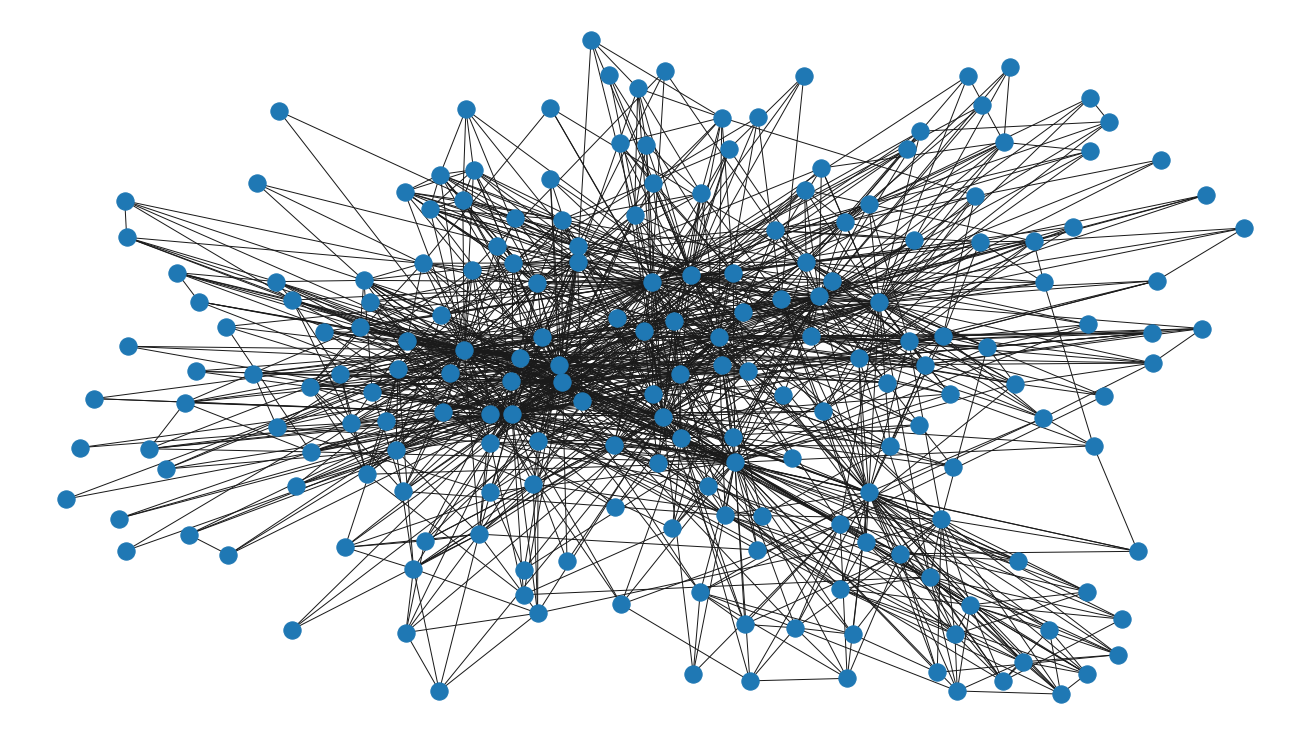

In [106]:
nx.draw(G)
plt.show()

In [108]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 1395
Average degree:  13.9500


In [109]:
for _ in range(k):
    communities=next(comp)

In [110]:
communities = tuple(sorted(c) for c in communities)

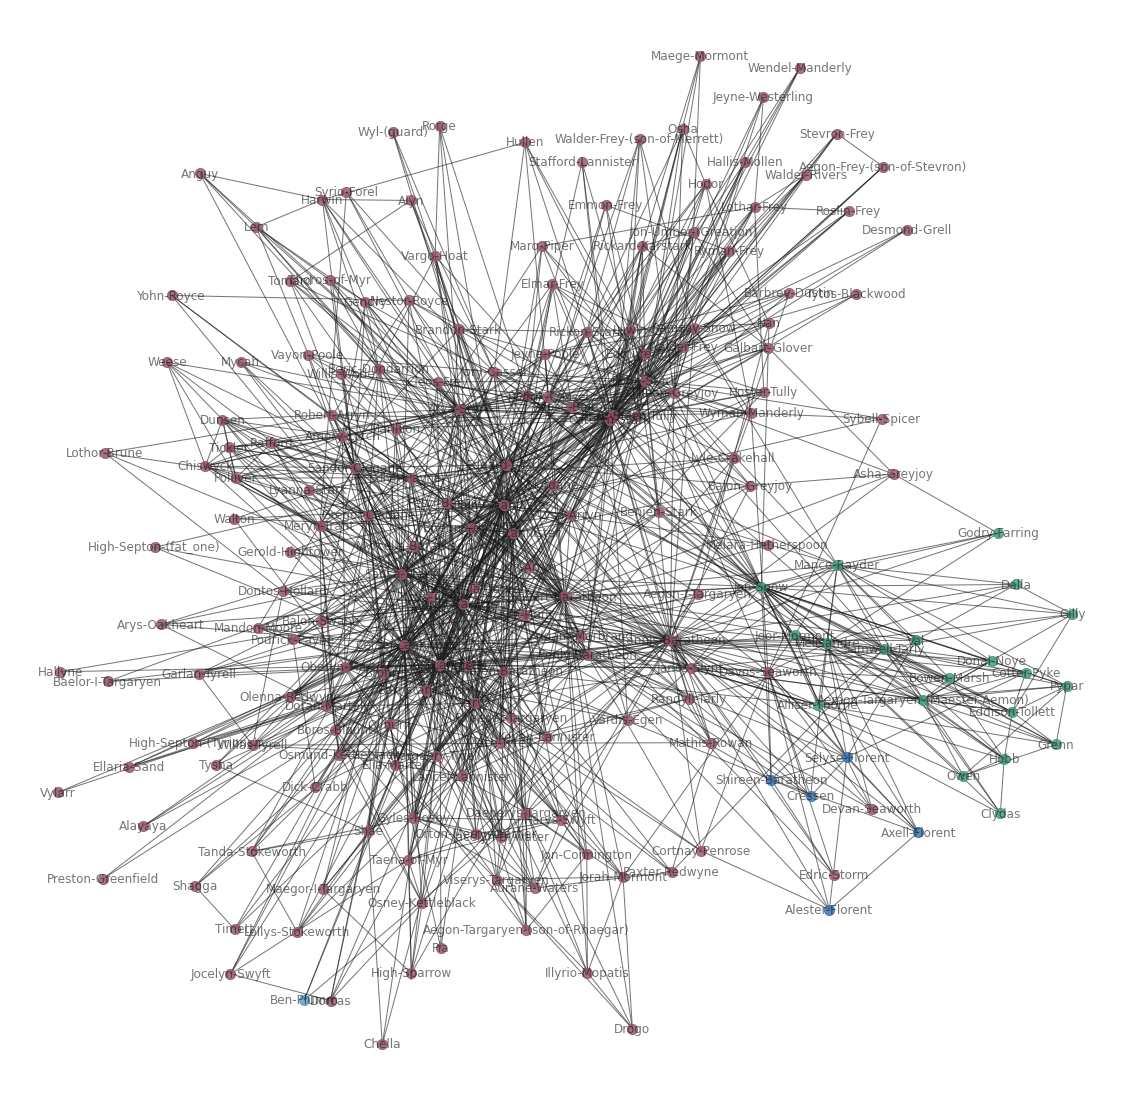

In [111]:
plt.figure(figsize=(20, 20))
plt.axis("off")
# Draw the graph, but don't color the nodes
params = {'G':G, 'node_size':100, 'alpha':0.6, 'pos':pos  }
nx.draw_networkx(**params, font_color='k', font_size=12)


colors = ['r','g', 'b', 'y', 'orange', 'purple']

#For each community list, draw the nodes, giving it a specific color.
for x in range(k):
    nx.draw_networkx_nodes(**params, nodelist=communities[x], node_color=colors[x])


plt.show()


### GOT-recommender system

You noticed that Facebook suggests you friends. There are many algorithms, but one of these is based on the “Open Triangles” which is a concept in social network theory. Triadic closure is the property among three nodes A, B, and C, such that if a strong tie exists between A-B and A-C, there is a weak or strong tie between B-C. This property is too extreme to hold true across very large, complex networks, but it is a useful simplification of reality that can be used to understand and predict networks.

Let’s try to make the top ten suggestions based on the “Open Triangles”

Extracted from this [blog-post](https://predictivehacks.com/social-network-analysis-of-game-of-thrones/)


In [112]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')

# Initialize the defaultdict: recommended
recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
            # Increment recommended
            recommended[(n1, n2)] += 1

recommended

defaultdict(int,
            {('Brynden-Tully', 'Cersei-Lannister'): 9,
             ('Brynden-Tully', 'Gyles-Rosby'): 2,
             ('Brynden-Tully', 'Jalabhar-Xho'): 1,
             ('Brynden-Tully', 'Joffrey-Baratheon'): 7,
             ('Brynden-Tully', 'Kevan-Lannister'): 4,
             ('Brynden-Tully', 'Oberyn-Martell'): 4,
             ('Brynden-Tully', 'Varys'): 6,
             ('Cersei-Lannister', 'Lyle-Crakehall'): 3,
             ('Gyles-Rosby', 'Jaime-Lannister'): 12,
             ('Gyles-Rosby', 'Kevan-Lannister'): 8,
             ('Gyles-Rosby', 'Lyle-Crakehall'): 1,
             ('Gyles-Rosby', 'Oberyn-Martell'): 6,
             ('Gyles-Rosby', 'Tywin-Lannister'): 8,
             ('Gyles-Rosby', 'Varys'): 9,
             ('Jaime-Lannister', 'Jalabhar-Xho'): 2,
             ('Jalabhar-Xho', 'Joffrey-Baratheon'): 3,
             ('Jalabhar-Xho', 'Kevan-Lannister'): 2,
             ('Jalabhar-Xho', 'Lyle-Crakehall'): 1,
             ('Jalabhar-Xho', 'Oberyn-Martell'): 2

In [113]:
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Arya-Stark', 'Stannis-Baratheon'), ('Bran-Stark', 'Jaime-Lannister'), ('Bran-Stark', 'Stannis-Baratheon'), ('Brienne-of-Tarth', 'Eddard-Stark'), ('Brienne-of-Tarth', 'Petyr-Baelish')]


### Interesting
- [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox)

# References: 

* [Network science book by Albert Laszlo Barabasi](http://networksciencebook.com/)
* [Networkx documentation](https://networkx.org/)

#### Special thanks to  
[María Pereda](https://mpereda.github.io/) and [Alberto Antonioni](https://sites.google.com/site/antonionialberto/home) for letting me use some of their materials in preparation of this sessions!